# Incident Root Cause Data Generation

This notebook documents the assumptions and validation steps used to generate
synthetic incident data for a root cause suggestion problem.

Real-world incident data is rarely publicly available due to security and
operational sensitivity, so synthetic data was generated to simulate realistic
system behavior with overlapping failure modes.

## Problem Definition

Given aggregated system metrics, logs, deployment metadata, and dependency
signals for an incident window, the goal is to suggest the most likely root
cause among common failure categories.

This is framed as a multi-class classification problem where ambiguity
is expected and acceptable.


## Root Cause Categories

The following root causes were modeled based on common production failures:

| Root Cause                  | Description                          |
| --------------------------- | ------------------------------------ |
| Normal                      | No actionable issue                  |
| Traffic Spike               | Sudden increase in request volume    |
| CPU Saturation              | Sustained high CPU usage             |
| Memory Leak                 | Gradual memory growth leading to OOM |
| Bad Deployment              | Fault introduced by recent release   |
| External Dependency Failure | Upstream service degradation         |

* The taxonomy is intentionally small to keep the problem realistic and interpretable.

## Metric Assumptions

Baseline system behavior was modeled using approximate ranges commonly observed
in production services:

- 40% for CPU usage and 50% for Memory Usage 
- Metrics are aggregated over a 30–60 minute incident window
- Log counts modeled as event frequencies
- Dependency signals treated independently of local resource usage


In [30]:
import sys
import os

# Adds the parent directory to the search path
# Change '..' to the relative path of your project root
sys.path.insert(0, os.path.abspath('..'))

from  src.data_generation import generate_incident
import pandas as pd


In [31]:
sample_df = pd.DataFrame(
    [generate_incident("CPU_SATURATION") for _ in range(100)]
)
sample_df.head()


,avg_cpu_usage,max_cpu_usage,avg_memory_usage,memory_growth_rate,request_rate,error_rate,p95_latency,time_since_last_deploy,deploy_happened_recently,upstream_error_rate,dependency_latency,error_log_count,timeout_log_count,oom_log_count,db_error_log_count,root_cause_label
0,98.218816,88.018131,54.760433,0.276842,336.164717,1.518043,345.804997,729.924245,0,0.168369,132.454012,5,6,1,3,CPU_SATURATION
1,87.488249,80.560548,57.433155,0.138948,300.520728,2.111748,325.560233,894.338081,0,0.166470,136.533488,2,1,0,0,CPU_SATURATION
2,70.374302,65.035129,62.886606,0.229788,331.217114,2.292868,254.138243,635.257466,0,0.561647,100.237645,10,4,1,3,CPU_SATURATION
3,87.895079,74.581289,43.061723,0.283935,429.903126,1.957474,346.577164,775.176468,0,0.298498,179.268989,6,2,0,2,CPU_SATURATION
4,75.089787,77.391215,47.620791,0.119344,254.575385,0.821565,352.174754,323.527676,0,0.348992,128.465709,6,1,2,4,CPU_SATURATION


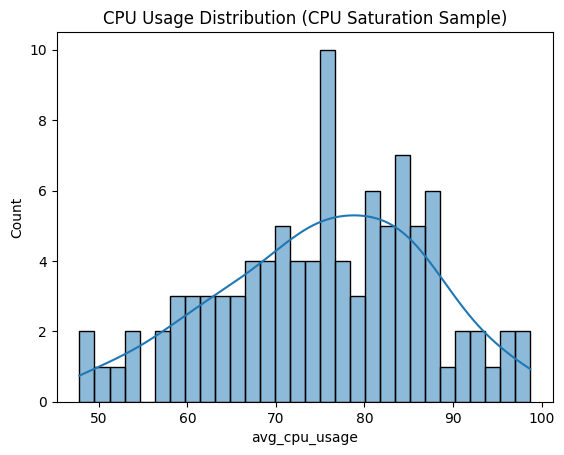

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(sample_df["avg_cpu_usage"], bins=30, kde=True)
plt.title("CPU Usage Distribution (CPU Saturation Sample)")
plt.show()


## Limitations

- Root cause labels are imperfect by design and may overlap.
- Temporal relationships between incidents are not modeled.
- Feature correlations may not fully reflect real production systems.
- The dataset is intended for root cause suggestion, not automated diagnosis.


## Summary

This notebook documents the assumptions behind the synthetic data generation
process and validates that generated metrics follow realistic distributions.
The generated dataset is used for downstream EDA and baseline modeling.